## The Hungarian Algorithm 

The Hungarian algorithm is a method used solve the linear sum assignment problem by minimizing a cost matrix of size n x n. This jupyter notebook will attempt to document the implementation of the Hungarian algorithm as it pertains to matching, or registering, 3D points from one matrix to 3D points in another matrix with the hopes of eventually applying the algorithm to real data sets in order to register individual synapses within an image across time. 

In [2]:
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
init_notebook_mode(connected = True)

## Hungarian Algorithm Implementation for Matrices of the Same Size 

**Step 1:** To begin, create any n x 3 matrix. The matrix is of size n x 3 because this Jupyter notebook will document the registration of 3D points in two separate matrices. Below, I have created an n x 3 matrix, E. 

In [53]:
E = np.array([[1, 3, 1], [2, 5, 3], [2, 0, 1]])
print(E)

[[1 3 1]
 [2 5 3]
 [2 0 1]]


**Step 2:** Now, create another n x 3 matrix that is a permutation of E. In the case below, I have created F, an n x 3 matrix where the rows of E have been shuffled around. 

In [54]:
F = np.array([[2, 0, 1], [2, 5, 3], [1, 3, 1]])
print(F)

[[2 0 1]
 [2 5 3]
 [1 3 1]]


**Step 3:** The Hungarian algorithm works by minimizing a cost matrix. In order to apply the Hungarian algorithm, we must provide it with some cost matrix as an input. I have chosen to compute the Euclidean distance between pairwise points in matrices E and F and will use the n x n Euclidean distance matrix as the cost matrix. 

In [55]:
cost = cdist(E, F) #cdist is a scipy function that calculates the Euclidean distances between pairwise points in matrices E and F.
print(cost)

[[ 3.16227766  3.          0.        ]
 [ 5.38516481  0.          3.        ]
 [ 0.          5.38516481  3.16227766]]


**Step 4:** Linear_sum_assignment is a function from the scipy.optimize module that implements the Hungarian algorithm. Row_ind, col_ind are row and column indices of the cost matrix that point to which elements in the cost matrix, when summed, produce a minimum value. 

In [56]:
row_ind, col_ind = linear_sum_assignment(cost)
print(row_ind)

[0 1 2]


In [197]:
cost[row_ind, col_ind] #row_ind and col_ind being applied to the cost matrix tells us which elements of the cost matrix, when summed, produce a minimum value. 

array([ 0.,  0.,  0.])

** Step 5:** Based on the minimized Euclidean distance results produced by the Hungarian algorithm, we can change the order of rows in F so that they match E.

In [58]:
new_F = F[col_ind]
print(new_F)

[[1 3 1]
 [2 5 3]
 [2 0 1]]


### More Examples of Hungarian Algorithm Implementation 

**Example 1**

In [59]:
A = np.array([[1, 3, 1], [2, 5, 3], [2, 0, 1]])
print(A)

[[1 3 1]
 [2 5 3]
 [2 0 1]]


In [60]:
B = np.array([[2, 0, 1], [2, 5, 3], [1, 3, 1]])
print(B)

[[2 0 1]
 [2 5 3]
 [1 3 1]]


In [61]:
cost = cdist(A, B)
print(cost)

[[ 3.16227766  3.          0.        ]
 [ 5.38516481  0.          3.        ]
 [ 0.          5.38516481  3.16227766]]


In [62]:
row_ind, col_ind = linear_sum_assignment(cost)
print(row_ind, col_ind)

[0 1 2] [2 1 0]


In [219]:
cost[row_ind, col_ind]

array([ 0.,  0.,  0.])

In [64]:
new_B = B[col_ind]
print(new_B)

[[1 3 1]
 [2 5 3]
 [2 0 1]]


**Example 2**

In [65]:
C = np.array([[1, 3, 1], [2, 5, 3], [2, 0, 1], [1, 1, 2], [1, 3, 4]])
print(C)

[[1 3 1]
 [2 5 3]
 [2 0 1]
 [1 1 2]
 [1 3 4]]


In [66]:
D = np.array([[2, 5, 3], [1, 3, 4], [1, 1, 2], [2, 0, 1], [1, 3, 1]])
print(D)

[[2 5 3]
 [1 3 4]
 [1 1 2]
 [2 0 1]
 [1 3 1]]


In [67]:
cost = cdist(C, D)
print(cost)

[[ 3.          3.          2.23606798  3.16227766  0.        ]
 [ 0.          2.44948974  4.24264069  5.38516481  3.        ]
 [ 5.38516481  4.35889894  1.73205081  0.          3.16227766]
 [ 4.24264069  2.82842712  0.          1.73205081  2.23606798]
 [ 2.44948974  0.          2.82842712  4.35889894  3.        ]]


In [68]:
row_ind, col_ind = linear_sum_assignment(cost)
print(row_ind, col_ind)

[0 1 2 3 4] [4 0 3 2 1]


In [232]:
cost[row_ind, col_ind]

array([ 0.,  0.,  0.,  0.,  0.])

In [70]:
new_D = D[col_ind]
print(new_D)

[[1 3 1]
 [2 5 3]
 [2 0 1]
 [1 1 2]
 [1 3 4]]


**Example 3**

In [71]:
X = np.array([[1, 3, 1], [2, 5, 3], [2, 0, 1], [1, 1, 2], [1, 3, 4]])
print(X)

[[1 3 1]
 [2 5 3]
 [2 0 1]
 [1 1 2]
 [1 3 4]]


In [72]:
Y = np.array([[2, 4, 4], [1, 3, 3], [1, 0, 1], [2, 2, 1], [1, 3, 0]])
print(Y)

[[2 4 4]
 [1 3 3]
 [1 0 1]
 [2 2 1]
 [1 3 0]]


In [73]:
cost = cdist(X, Y)
print(cost)

[[ 3.31662479  2.          3.          1.41421356  1.        ]
 [ 1.41421356  2.23606798  5.47722558  3.60555128  3.74165739]
 [ 5.          3.74165739  1.          2.          3.31662479]
 [ 3.74165739  2.23606798  1.41421356  1.73205081  2.82842712]
 [ 1.41421356  1.          4.24264069  3.31662479  4.        ]]


In [74]:
row_ind, col_ind = linear_sum_assignment(cost)
print(row_ind, col_ind)

[0 1 2 3 4] [4 0 2 3 1]


In [240]:
cost[row_ind, col_ind]

array([ 1.        ,  1.41421356,  1.        ,  1.73205081,  1.        ])

In [75]:
new_Y = Y[col_ind]
print(new_Y)

[[1 3 0]
 [2 4 4]
 [1 0 1]
 [2 2 1]
 [1 3 3]]


## Hungarian Algorithm Implementation for Matrices of Different Sizes 

#### Example 1

In [49]:
A = np.array([[0, 1, 2], [1, 3, 0], [1, 1, 4], [0.67, 1.67, 2]])
print(A)

[[ 0.    1.    2.  ]
 [ 1.    3.    0.  ]
 [ 1.    1.    4.  ]
 [ 0.67  1.67  2.  ]]


In [50]:
B = np.array([[1, 3, 0], [0, 1, 2], [2, 3, 7], [1, 1, 4]])
print(B)

[[1 3 0]
 [0 1 2]
 [2 3 7]
 [1 1 4]]


In [51]:
cost = cdist(A, B)
print(cost)

[[ 3.          0.          5.74456265  2.23606798]
 [ 0.          3.          7.07106781  4.47213595]
 [ 4.47213595  2.23606798  3.74165739  0.        ]
 [ 2.42441746  0.94752309  5.34207825  2.13490047]]


In [52]:
row_ind, col_ind = linear_sum_assignment(cost)
print(row_ind, col_ind)

[0 1 2 3] [1 0 3 2]


In [48]:
new_B = B[col_ind]
print(new_B)

[[0 1 2]
 [1 3 0]
 [1 1 4]
 [2 3 7]]


#### Example 2

In [76]:
A = np.array([[0, 1, 2], [2, 4, 3], [1, 2, 7]])
print(A)

[[0 1 2]
 [2 4 3]
 [1 2 7]]


A is a 3 x 3 matrix. B, however, is a 6 x 3 matrix. If we are trying to match points in B to points in A, then we must somehow create 3 additional points in A so that we can use the Hungarian algorithm, which is much simpler to employ using matrices of the same size. To create these 3 additional points, we can take the mean of each column. 

In [30]:
new_A = np.array([[0, 1, 2], [2, 4, 3], [1, 2, 7], [1, 2.33, 4], [1, 1.43, 4], [1, 2.152, 4]])
print(new_A)

[[ 0.     1.     2.   ]
 [ 2.     4.     3.   ]
 [ 1.     2.     7.   ]
 [ 1.     2.33   4.   ]
 [ 1.     1.43   4.   ]
 [ 1.     2.152  4.   ]]


In [31]:
B = np.array([[2, 4, 3], [3, 5, 2], [1, 3, 1], [0, 1, 2], [1, 2, 7], [1, 1, 1]])
print(B)

[[2 4 3]
 [3 5 2]
 [1 3 1]
 [0 1 2]
 [1 2 7]
 [1 1 1]]


In [21]:
cost = cdist(new_A, B)
print(cost)

[[ 3.74165739  5.          2.44948974  0.          5.19615242  1.41421356]
 [ 0.          1.73205081  2.44948974  3.74165739  4.58257569  3.74165739]
 [ 4.58257569  6.164414    6.08276253  5.19615242  0.          6.08276253]
 [ 2.18835555  3.88958867  3.07390631  2.60171098  3.01809543  3.28160022]
 [ 2.93341098  4.55465696  3.38598582  2.27703755  3.05366992  3.03065999]
 [ 2.3270376   4.01386397  3.11754775  2.51537353  3.0038482   3.21358118]]


In [23]:
row_ind, col_ind = linear_sum_assignment(cost)
print(row_ind, col_ind)

[0 1 2 3 4 5] [3 0 4 1 5 2]


In [35]:
new_B = B[col_ind] 
print(new_B)

[[0 1 2]
 [2 4 3]
 [1 2 7]
 [3 5 2]
 [1 1 1]
 [1 3 1]]


## Hungarian Algorithm Practical Application

#### Example 1

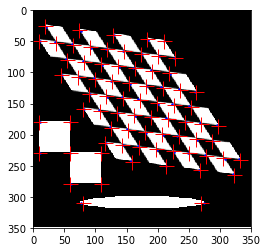

In [290]:
from matplotlib import pyplot as plt

from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse


tform = AffineTransform(scale = (1.3, 1.1), rotation = 1, shear = 0.7,
                        translation = (210, 50))
image = warp(data.checkerboard(), tform.inverse, output_shape = (350, 350))
rr, cc = ellipse(310, 175, 10, 100)
image[rr, cc] = 1
image[180:230, 10:60] = 1
image[230:280, 60:110] = 1

coords_A = corner_peaks(corner_harris(image), min_distance=5)
coords_subpix = corner_subpix(image, coords_A, window_size=13)

fig, ax = plt.subplots()
ax.imshow(image, interpolation = 'nearest', cmap = plt.cm.gray)
ax.plot(coords_A[:, 1], coords_A[:, 0], '.b', markersize = 3)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize = 15)
ax.axis((0, 350, 350, 0))
plt.show()

In [291]:
print(coords_A)

[[ 26  21]
 [ 33  76]
 [ 40 130]
 [ 47 185]
 [ 49  11]
 [ 50 210]
 [ 51  35]
 [ 54  62]
 [ 60  93]
 [ 62 117]
 [ 65 144]
 [ 71 175]
 [ 74 202]
 [ 76 226]
 [ 78  52]
 [ 82  80]
 [ 88 111]
 [ 91 138]
 [ 92 161]
 [ 96 189]
 [102 220]
 [104  46]
 [108  74]
 [109  97]
 [113 125]
 [119 156]
 [122 183]
 [123 206]
 [127 234]
 [131 261]
 [135  91]
 [139 119]
 [140 142]
 [143 169]
 [150 201]
 [151 224]
 [154 251]
 [159  82]
 [160 105]
 [166 136]
 [170 164]
 [171 187]
 [174 214]
 [180  10]
 [180  59]
 [180 245]
 [182 269]
 [185 296]
 [188 123]
 [191 150]
 [197 181]
 [201 209]
 [202 232]
 [208 263]
 [211 290]
 [214 117]
 [217 144]
 [219 168]
 [225 199]
 [228 226]
 [229  10]
 [229  59]
 [229 249]
 [230 109]
 [233 277]
 [239 308]
 [240 331]
 [242 158]
 [250 213]
 [257 267]
 [264 322]
 [279  60]
 [279 109]
 [310  76]
 [310 274]]


In [292]:
coords_A.shape

(75, 2)

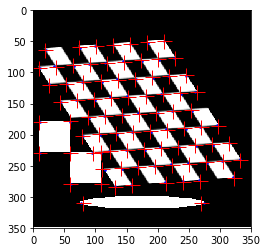

In [293]:
from matplotlib import pyplot as plt

from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse


tform = AffineTransform(scale = (1.3, 1.1), rotation = 1, shear = 0.5,
                        translation = (210, 50))
image = warp(data.checkerboard(), tform.inverse, output_shape = (350, 350))
rr, cc = ellipse(310, 175, 10, 100)
image[rr, cc] = 1
image[180:230, 10:60] = 1
image[230:280, 60:110] = 1

coords_B = corner_peaks(corner_harris(image), min_distance = 5)
coords_subpix = corner_subpix(image, coords_B, window_size =13)

fig, ax = plt.subplots()
ax.imshow(image, interpolation = 'nearest', cmap = plt.cm.gray)
ax.plot(coords_B[:, 1], coords_B[:, 0], '.b', markersize = 3)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize = 15)
ax.axis((0, 350, 350, 0))
plt.show()

In [294]:
print(coords_B)

[[ 50 210]
 [ 52 184]
 [ 54 155]
 [ 56 129]
 [ 58 100]
 [ 60  75]
 [ 64  20]
 [ 76 226]
 [ 80 202]
 [ 82 144]
 [ 82 175]
 [ 84 116]
 [ 86  89]
 [ 89  34]
 [ 89  65]
 [ 93  10]
 [105 216]
 [105 245]
 [109 192]
 [111 134]
 [111 165]
 [115  79]
 [115 110]
 [119  26]
 [119  55]
 [131 261]
 [134 206]
 [134 237]
 [138 151]
 [138 182]
 [140 124]
 [144  69]
 [144 100]
 [148  45]
 [162 224]
 [162 255]
 [166 169]
 [166 200]
 [169 145]
 [170 114]
 [173  90]
 [180  10]
 [180  59]
 [185 296]
 [187 269]
 [191 214]
 [191 245]
 [195 159]
 [195 190]
 [199 135]
 [201 108]
 [202  80]
 [214 315]
 [216 290]
 [218 262]
 [220 204]
 [220 235]
 [224 149]
 [224 180]
 [226 122]
 [229  10]
 [229  59]
 [229  95]
 [230 109]
 [240 332]
 [242 304]
 [246 249]
 [246 280]
 [248 222]
 [250 194]
 [252 167]
 [255 143]
 [257 115]
 [269 322]
 [273 267]
 [275 241]
 [277 212]
 [279  60]
 [279 109]
 [281 157]
 [283 132]
 [310  76]
 [310 274]]


In [295]:
coords_B.shape

(83, 2)

In [296]:
cost = cdist(coords_A, coords_B)
print(cost)

[[ 190.51771571  165.06059493  136.89411967 ...,  279.94642345
   289.27668416  380.34852438]
 [ 135.07405376  109.658561     81.74350127 ...,  256.19523805  277.
   340.48935372]
 [  80.62257748   55.31726674   28.65309756 ...,  243.00823031
   275.34705373  306.        ]
 ..., 
 [ 250.28383887  239.06902769  229.65408771 ...,   23.34523506
    45.27692569  167.88686667]
 [ 292.49957265  279.6926885   267.91229908 ...,   62.16912417    0.          198.        ]
 [ 267.76108754  273.24714088  282.30657095 ...,  144.54411091  198.            0.        ]]


In [297]:
row_ind, col_ind = linear_sum_assignment(cost)

In [298]:
cost[row_ind, col_ind]

array([ 38.01315562,  27.01851217,  16.03121954,   5.09901951,
        44.01136217,   0.        ,  38.01315562,  35.12833614,
         7.28010989,  22.02271555,  15.55634919,  11.        ,
         6.        ,   0.        ,  48.54894438,   9.8488578 ,
        27.01851217,  10.81665383,  19.41648784,  28.46049894,
        25.17935662,  44.01136217,  21.9544984 ,  18.97366596,
         9.21954446,  19.6468827 ,  15.8113883 ,  11.        ,
         7.61577311,   0.        ,  23.76972865,  19.6468827 ,
        18.        ,  13.92838828,  16.03121954,  11.        ,
         8.94427191,  16.1245155 ,  13.45362405,   9.48683298,
         6.40312424,  36.87817783,  17.        ,   0.        ,
         0.        ,  11.        ,   5.        ,   0.        ,
        19.84943324,  17.        ,   9.21954446,  19.6468827 ,
        18.24828759,  10.04987562,   5.        ,  13.        ,
         8.60232527,  13.        ,  25.49509757,  20.39607805,
         0.        ,   0.        ,  17.        ,   0.  

In [416]:
new_coords_B = coords_B[col_ind]
print(new_coords_B)

[[ 76 226]
 [ 80 202]
 [ 58 100]
 [ 50 210]
 [ 54 155]
 [ 52 184]
 [ 56 129]
 [ 82 175]
 [ 60  75]
 [ 84 116]
 [105 245]
 [111 134]
 [ 89  34]
 [ 89  65]
 [119  26]
 [ 64  20]
 [105 216]
 [ 82 144]
 [ 93  10]
 [109 192]
 [ 86  89]
 [119  55]
 [115 110]
 [134 237]
 [111 165]
 [115  79]
 [138 182]
 [131 261]
 [134 206]
 [148  45]
 [138 151]
 [169 145]
 [162 255]
 [180  59]
 [140 124]
 [144  69]
 [144 100]
 [162 224]
 [166 200]
 [191 245]
 [180  10]
 [170 114]
 [185 296]
 [187 269]
 [191 214]
 [166 169]
 [199 135]
 [173  90]
 [220 204]
 [195 159]
 [201 108]
 [195 190]
 [218 262]
 [214 315]
 [220 235]
 [202  80]
 [216 290]]


#### Example 2

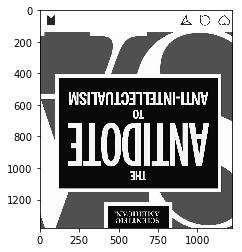

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import corner_harris, corner_peaks
from PIL import Image


fname = 'SA_2.jpeg'
image_1 = Image.open(fname).convert("L")
arr = np.asarray(image_1)
coords_SA_1 = corner_peaks(corner_harris(image_1), min_distance = 10)
plt.imshow(arr, cmap = 'gray')
plt.show()

In [4]:
coords_SA_1

array([[  32,  924],
       [  35,   44],
       [  35,   93],
       [  38, 1164],
       [  40, 1018],
       [  43,  922],
       [  52,   69],
       [  68,  927],
       [  82, 1164],
       [  89,  902],
       [  89,  949],
       [  93,  889],
       [  94,   44],
       [  94,   93],
       [ 138,   29],
       [ 138,  312],
       [ 138,  677],
       [ 165,  314],
       [ 165,  676],
       [ 404,  450],
       [ 405,  613],
       [ 405,  762],
       [ 406,   95],
       [ 406, 1145],
       [ 429,  118],
       [ 429, 1122],
       [ 520,  184],
       [ 520,  196],
       [ 520,  208],
       [ 520,  219],
       [ 520,  231],
       [ 520,  242],
       [ 520,  301],
       [ 520,  321],
       [ 520,  363],
       [ 520,  377],
       [ 520,  401],
       [ 520,  413],
       [ 520,  481],
       [ 520,  496],
       [ 520,  564],
       [ 520,  606],
       [ 520,  649],
       [ 520,  692],
       [ 520,  730],
       [ 520,  749],
       [ 520,  764],
       [ 520,

In [5]:
coords_SA_1.shape

(277, 2)

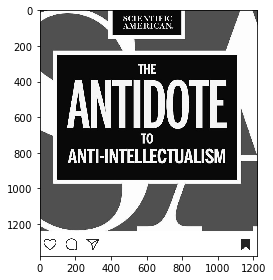

In [6]:
from PIL import Image
from skimage import data 
from skimage.transform import rotate

fname = 'SA_2.jpeg'
image_2 = Image.open(fname).convert("L")
arr = np.asarray(image_2)
new_pic = rotate(arr, 180)
coords_SA_2 = corner_peaks(corner_harris(new_pic), min_distance = 10)

plt.imshow(arr, cmap = 'gray')
from skimage.io import imshow, show
imshow(new_pic)
show()

In [7]:
print(coords_SA_2)

[[  32  518]
 [  32  555]
 [  32  570]
 [  32  638]
 [  32  688]
 [  32  737]
 [  33  621]
 [  33  667]
 [  33  704]
 [  38  583]
 [  40  486]
 [  45  556]
 [  45  675]
 [  49  601]
 [  59  483]
 [  60  527]
 [  60  548]
 [  60  582]
 [  60  621]
 [  60  647]
 [  60  667]
 [  60  697]
 [  61  467]
 [  61  570]
 [  61  603]
 [  63  381]
 [  74  480]
 [  74  510]
 [  74  571]
 [  74  665]
 [  74  684]
 [  74  706]
 [  75  535]
 [  75  547]
 [  75  583]
 [  75  621]
 [  75  731]
 [  88  591]
 [  88  602]
 [  90  556]
 [  92  480]
 [  92  684]
 [ 101  504]
 [ 101  535]
 [ 101  547]
 [ 101  609]
 [ 102  583]
 [ 102  621]
 [ 103  517]
 [ 103  571]
 [ 103  713]
 [ 103  731]
 [ 139  406]
 [ 139  790]
 [ 162  383]
 [ 162  813]
 [ 164  529]
 [ 226  460]
 [ 228   74]
 [ 251   97]
 [ 251 1101]
 [ 303  583]
 [ 303  621]
 [ 310  549]
 [ 310  646]
 [ 312  570]
 [ 323  595]
 [ 334  595]
 [ 334  632]
 [ 357  569]
 [ 357  647]
 [ 358  583]
 [ 358  621]
 [ 391   72]
 [ 392  196]
 [ 392  233]
 [ 393  287]

In [8]:
coords_SA_2.shape

(277, 2)

In [9]:
cost = cdist(coords_SA_2, coords_SA_1)

In [10]:
row_ind, col_ind = linear_sum_assignment(cost)

In [11]:
fixed_coords_SA_2 = coords_SA_2[col_ind]

In [12]:
print(fixed_coords_SA_2)

[[  32  570]
 [ 101  504]
 [ 427  479]
 [  33  704]
 [  32  638]
 [  32  518]
 [  60  621]
 [  32  737]
 [  32  688]
 [ 101  547]
 [  32  555]
 [ 424  836]
 [  33  667]
 [ 103  517]
 [  33  621]
 [ 392  233]
 [ 426  910]
 [ 662  366]
 [ 103  571]
 [  60  548]
 [ 425 1041]
 [  40  486]
 [  49  601]
 [ 101  535]
 [ 102  583]
 [  45  675]
 [  60  527]
 [ 310  646]
 [ 334  632]
 [ 103  713]
 [ 103  731]
 [  45  556]
 [ 393  945]
 [ 393  836]
 [ 391   72]
 [  60  697]
 [  38  583]
 [ 630  620]
 [ 630  990]
 [ 425  514]
 [  75  535]
 [ 393  560]
 [ 392  196]
 [  60  647]
 [ 503  990]
 [ 101  609]
 [ 594  197]
 [ 102  621]
 [  75  731]
 [ 358  621]
 [ 426  620]
 [ 162  383]
 [  60  582]
 [ 164  529]
 [  74  706]
 [ 251 1101]
 [  90  556]
 [  75  583]
 [  59  483]
 [  61  603]
 [  61  570]
 [  92  684]
 [ 662  318]
 [ 312  570]
 [ 425  405]
 [ 427  439]
 [  60  667]
 [ 358  583]
 [ 426  990]
 [ 593  230]
 [ 425  945]
 [ 323  595]
 [ 778  389]
 [  61  467]
 [  74  480]
 [  74  571]
 [  74  684]

In [13]:
fixed_coords_SA_2.shape

(277, 2)

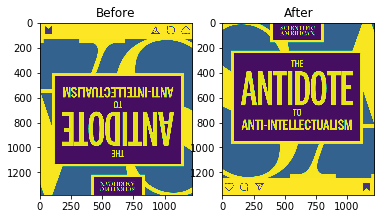

In [14]:
fig = plt.figure()
x = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(image_1)
x.set_title('Before')

x = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(new_pic)
x.set_title('After')
plt.show()